The below [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) extension ensures that if any locally imported python files change, the modules defined there are reloaded

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
%load_ext autoreload
%autoreload 2

The below imports [`here`](https://pypi.org/project/pyprojroot/), which allows one to refer to the root directory of the project in a consistent manner across execution environments. It then adds `here()` (the root directory) to the system path to ensure that we can load python modules defined in the project.

In [4]:
from hereutil import here, add_to_sys_path
add_to_sys_path(here())

Having ensured that the root path of the project is in the system path, we can load common basis functions from [src/common_basis.py](/src/common_basis.py). The template assumes that functions useful for most work be defined in `common_basis.py`, whereas code useful for individual analyses is defined where needed.

Here, we load the three datasets from parquet files using `load_abortion_parquet()`, `load_lynching_parquet()` and `load_incel_parquet()`. Each dataset is loaded as a dataclass with Pandas dataframes as its named attributes. Due to their total size of 4.6 gigabytes, the parquet files are not distributed in Git. Instead to download them from https://a3s.fi/dhh23-disc-parquet/, you can run `fetch-parquets.sh` within the `data/input/parquet` directory. Otherwise, the following code will certainly fail.

In [5]:
from src.common_basis import *
a = load_abortion_parquet()
a

KeyboardInterrupt: 

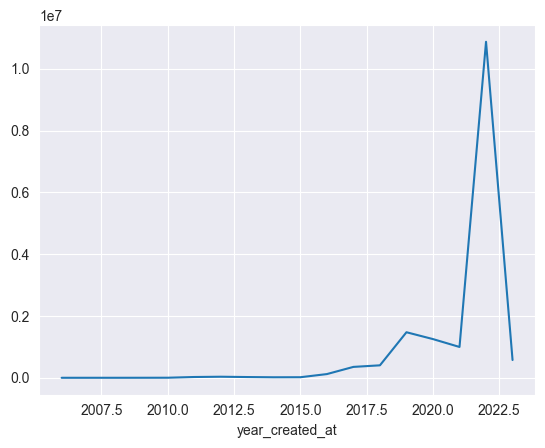

In [27]:
s = a.abortion_tweets.groupby('year_created_at').size()
s.plot(x=s.index,y=s.values)
plt.show()


In [ ]:
from src.common_basis import *

i = load_incel_parquet()
i

In [298]:
i.incel_users

,user_id,user_name,user_title,user_joined,user_total_posts
0,0,ControlledInsanity,Legit NoFap World Champion AMA,2018-04-14 21:00:00,2825
1,1,LesscoBlob,Ryan Gosling is literally ME,2022-01-24 22:00:00,11759
2,2,Ducky,"Supreme Gentleman, Scholar, and Evil-Doer",2022-05-17 21:00:00,1941
3,3,Misogynist Curry 卐,Loves to fap to pawgs,2022-03-24 22:00:00,7869
4,4,BrettyBoy,Locally undesired.,2019-02-13 22:00:00,101836
...,...,...,...,...,...
8565,8565,MadScientist,Greycel,2018-05-21 21:00:00,3
8566,8566,Øllie,Greycel,2018-11-17 22:00:00,2
8567,8567,Dylansaga,Greycel,2018-05-11 21:00:00,68
8568,8568,yungnani,coping with sports,2021-04-26 21:00:00,7


In [42]:
s = i.incel_users.user_total_posts.sort_values(ascending=True)


<Axes: xlabel='user_total_posts', ylabel='Density'>

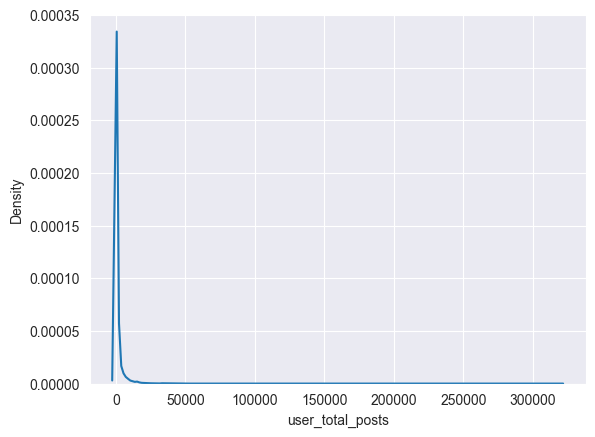

In [43]:
import seaborn as sns
sns.kdeplot(s)

In [52]:
import pandas as pd
i.incel_users.groupby(pd.Grouper(key="user_joined", freq="1M")).mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [56]:
i.incel_users.user_joined = pd.to_datetime(i.incel_users['user_joined'], errors='coerce')

In [70]:
i.incel_users#.groupby(pd.Grouper(key="user_joined", freq="1M")).count()

,user_id,user_name,user_title,user_joined,user_total_posts
0,0,ControlledInsanity,Legit NoFap World Champion AMA,2018-04-14 21:00:00,2825
1,1,LesscoBlob,Ryan Gosling is literally ME,2022-01-24 22:00:00,11759
2,2,Ducky,"Supreme Gentleman, Scholar, and Evil-Doer",2022-05-17 21:00:00,1941
3,3,Misogynist Curry 卐,Loves to fap to pawgs,2022-03-24 22:00:00,7869
4,4,BrettyBoy,Locally undesired.,2019-02-13 22:00:00,101836
...,...,...,...,...,...
8565,8565,MadScientist,Greycel,2018-05-21 21:00:00,3
8566,8566,Øllie,Greycel,2018-11-17 22:00:00,2
8567,8567,Dylansaga,Greycel,2018-05-11 21:00:00,68
8568,8568,yungnani,coping with sports,2021-04-26 21:00:00,7


In [71]:
i.incel_users.groupby(pd.Grouper(key="user_joined", freq="1M")).count()

,user_id,user_name,user_title,user_total_posts
user_joined,,,,
2017-11-30,562,562,562,562
2017-12-31,195,195,195,195
2018-01-31,213,213,213,213
2018-02-28,262,262,262,262
2018-03-31,184,184,184,184
...,...,...,...,...
2022-12-31,121,121,121,121
2023-01-31,111,111,111,111
2023-02-28,114,114,114,114


In [1]:
# Sum of posts by new users per month
i.incel_users.groupby(pd.Grouper(key="user_joined", freq="1M")).user_total_posts.sum().plot()
plt.legend(["Total number of posts"])

NameError: name 'i' is not defined

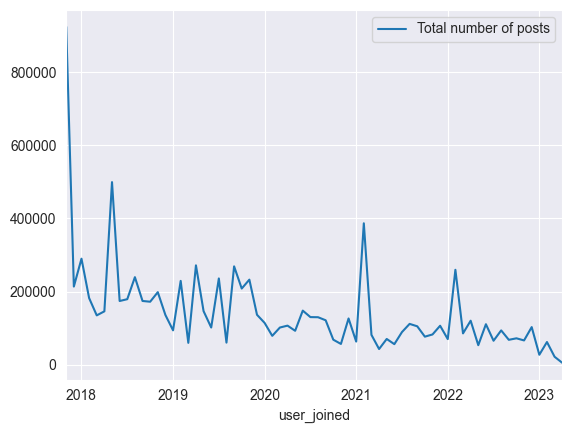

In [128]:
# Select users that are posting in january
i.incel_users.groupby(pd.Grouper(key="user_joined", freq="1M")).user_total_posts.sum().plot()
plt.legend(["Total number of posts"])

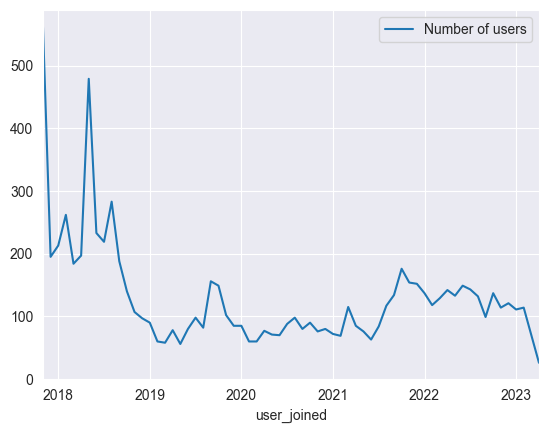

In [77]:
# New users per month
i.incel_users.groupby(pd.Grouper(key="user_joined", freq="1M")).user_id.count().plot()
plt.legend(["Number of users"])

In [121]:
# Select users from Jan and February. How to make it robust? Check month by month

i.incel_users.groupby(pd.Grouper(key="user_joined", freq="1M")).user_id.value_counts()#.plot()

TypeError: 'SeriesGroupBy' object is not callable

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'sum'

In [126]:
i.incel_users.groupby(pd.Grouper(key="user_joined", freq="1M")).count()#.user_id.value_counts()

,user_id,user_name,user_title,user_total_posts
user_joined,,,,
2017-11-30,562,562,562,562
2017-12-31,195,195,195,195
2018-01-31,213,213,213,213
2018-02-28,262,262,262,262
2018-03-31,184,184,184,184
...,...,...,...,...
2022-12-31,121,121,121,121
2023-01-31,111,111,111,111
2023-02-28,114,114,114,114


In [158]:
s = i.incel_posts[['poster_id', 'time_posted', 'post_content']]

# convert post to length
s['post_length'] = s.post_content.str.len()

# covert date to numeric
s.time_posted = pd.to_datetime(s.time_posted)
s.time_posted = pd.to_numeric(s.time_posted)
s

# find correlations
s[['time_posted', 'post_length']].corr()

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_88071/3741462006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['post_length'] = s.post_content.str.len()
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_88071/3741462006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.time_posted = pd.to_datetime(s.time_posted)
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_88071/3741462006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,time_posted,post_length
time_posted,1.000000,0.021027
post_length,0.021027,1.000000


In [296]:
# Filter out posts in january
s = i.incel_posts[['poster_id', 'time_posted', 'post_content']]

# add column with month
s['month'] = s.time_posted.dt.month

# convert post to length
s['post_length'] = s.post_content.str.len()

# covert date to numeric
s.time_posted = pd.to_datetime(s.time_posted)
s.time_posted = pd.to_numeric(s.time_posted)

# Select rows containing January

#s = s.loc[(s['month'] == 1) & (s['month'] == 2)]
#s = s.loc[s['month'].isin([1])]

#s[['time_posted', 'post_length','month']].head(1000).corr()

#print(s.loc['2018-01-01 00:00:00':'2018-02-01 00:00:00'])
#s
#s = i.incel_posts[(i.incel_posts['time_posted'] > '2018-01-01') & (i.incel_posts['time_posted'] < '2018-02-01')]

AttributeError: Can only use .dt accessor with datetimelike values

In [242]:
# remove posts with 0 length
s = s.loc[s['post_length'] >= 3]
s
#s.pivot_table(index='time_posted', columns='month', values='post_length')


,poster_id,time_posted,post_content,month,post_length
0,0,1654131755000000000,Or maybe she just realized Chad will never com...,6,100
1,1,1654131856000000000,Ofc Chad will never commit to a crazy bpd toilet.,6,49
2,2,1654132352000000000,Ill give her a ride in exchange for some head.,6,46
3,0,1654132835000000000,A man doing the same thing would have been sub...,6,138
4,3,1654136756000000000,ControlledInsanity said: A man doing the ...,6,204
...,...,...,...,...,...
2266019,1111,1512087946000000000,WarmIncelation said: From my perspective ...,12,318
2266020,444,1512090002000000000,universallyabhorred said: Finally it is w...,12,1204
2266021,1111,1512090234000000000,nausea said: I am sure the admin and the ...,12,851
2266022,444,1512091423000000000,universallyabhorred said: Admins don't gi...,12,1075


In [ ]:
#s.month = s.month.astype(str)

In [245]:
#s.loc[s['month'].isin([1,2])][['post_length','month']].corr()
corr = s[['post_length','month']].corr()

<Axes: >

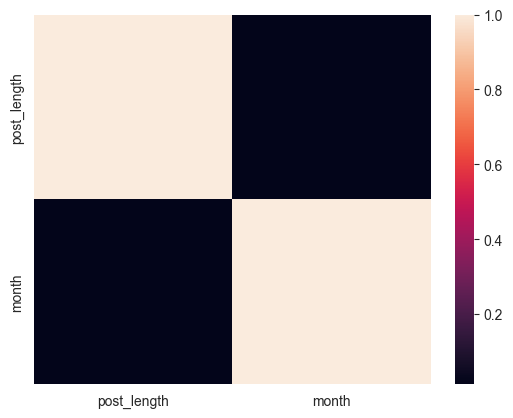

In [246]:
# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [247]:
i

IncelData(incel_threads, incel_posts, incel_users, incel_quotes)

In [250]:
i.incel_users

,user_id,user_name,user_title,user_joined,user_total_posts
0,0,ControlledInsanity,Legit NoFap World Champion AMA,2018-04-14 21:00:00,2825
1,1,LesscoBlob,Ryan Gosling is literally ME,2022-01-24 22:00:00,11759
2,2,Ducky,"Supreme Gentleman, Scholar, and Evil-Doer",2022-05-17 21:00:00,1941
3,3,Misogynist Curry 卐,Loves to fap to pawgs,2022-03-24 22:00:00,7869
4,4,BrettyBoy,Locally undesired.,2019-02-13 22:00:00,101836
...,...,...,...,...,...
8565,8565,MadScientist,Greycel,2018-05-21 21:00:00,3
8566,8566,Øllie,Greycel,2018-11-17 22:00:00,2
8567,8567,Dylansaga,Greycel,2018-05-11 21:00:00,68
8568,8568,yungnani,coping with sports,2021-04-26 21:00:00,7


In [304]:
s = i.incel_users

# covert date to numeric
s.user_joined = pd.to_datetime(s.user_joined)
#s.user_joined = pd.to_numeric(s.user_joined)

s[['user_joined','user_total_posts']].corr()

,user_joined,user_total_posts
user_joined,1.000000,0.001618
user_total_posts,0.001618,1.000000


In [289]:
s = i.incel_posts
s['post_length'] = s.post_content.str.len()
# covert date to numeric
s.time_posted = pd.to_datetime(s.time_posted)
s.time_posted = pd.to_numeric(s.time_posted)


s[['time_posted','post_length']].corr()

,time_posted,post_length
time_posted,1.000000,0.021027
post_length,0.021027,1.000000


In [306]:
# Select users who joined during first year
start_date = '2018-01-01'
end_date = '2018-03-01'
mask_old = (s['user_joined'] > start_date) & (s['user_joined'] <= end_date)
#print(s.loc[mask])

#save ID's of old users:
old_users = s.user_id.loc[mask_old].to_list()

# Select users who joined last year
mask_new = (s['user_joined'] > start_date) & (s['user_joined'] <= end_date)
new_users = s.user_id.loc[mask_new].to_list()

In [275]:
len(new_users)

225

In [276]:
len(old_users)
# Filter out marked as banned?


475

In [279]:
import statsmodels.api as sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 7.6 MB/s eta 0:00:0000:0100:01
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [280]:
import statsmodels.api as sm


In [302]:
s[[]]

,poster_id,time_posted,post_content,month,post_length
0,0,1654131755000000000,Or maybe she just realized Chad will never com...,6,100
1,1,1654131856000000000,Ofc Chad will never commit to a crazy bpd toilet.,6,49
2,2,1654132352000000000,Ill give her a ride in exchange for some head.,6,46
3,0,1654132835000000000,A man doing the same thing would have been sub...,6,138
4,3,1654136756000000000,ControlledInsanity said: A man doing the ...,6,204
...,...,...,...,...,...
2266019,1111,1512087946000000000,WarmIncelation said: From my perspective ...,12,318
2266020,444,1512090002000000000,universallyabhorred said: Finally it is w...,12,1204
2266021,1111,1512090234000000000,nausea said: I am sure the admin and the ...,12,851
2266022,444,1512091423000000000,universallyabhorred said: Admins don't gi...,12,1075


In [299]:
# data
s = i.incel_posts

s = i.incel_posts[['poster_id', 'time_posted', 'post_content']]

# add column with month
s['month'] = s.time_posted.dt.month

# convert post to length
s['post_length'] = s.post_content.str.len()
s.month = s.month.astype(str)

# covert date to numeric
s.time_posted = pd.to_datetime(s.time_posted)
s.time_posted = pd.to_numeric(s.time_posted)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_88071/279817212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['month'] = s.time_posted.dt.month
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_88071/279817212.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['post_length'] = s.post_content.str.len()
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_88071/279817212.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

                            OLS Regression Results                            
Dep. Variable:            post_length   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     90.11
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.62e-205
Time:                        17:40:42   Log-Likelihood:            -1.7656e+07
No. Observations:             2266024   AIC:                         3.531e+07
Df Residuals:                 2266012   BIC:                         3.531e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     181.1615      1.249    145.079      

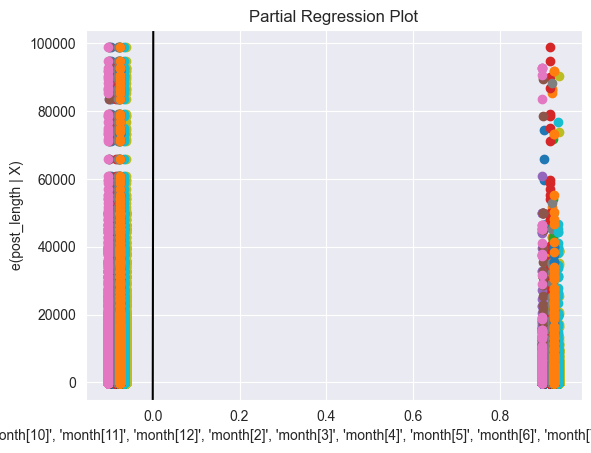

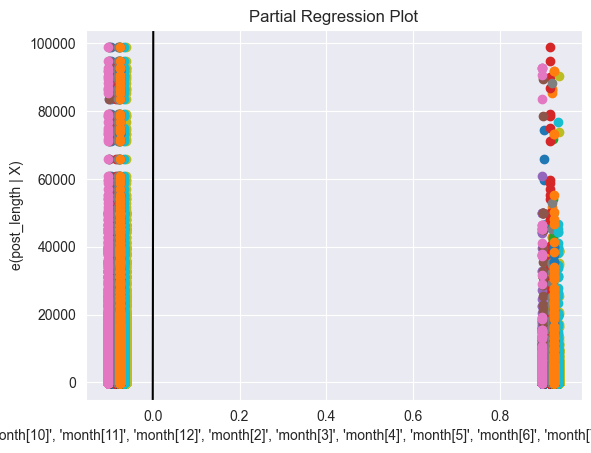

In [300]:
from patsy import dmatrices

y, X = dmatrices('post_length ~ month', data=s, return_type='dataframe')

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params
print(results.summary())

sm.graphics.plot_partregress(endog='post_length', exog_i='month',
                              exog_others=[],
                              data=s, obs_labels=False)


# Cleaning up users

In [344]:
# open incel users list
s = i.incel_users
# Remove banned
s = s.loc[s['user_title'] != 'Banned']
# Remove Deleted members
# Regex pattern to match strings starting with 'Removed'
pattern = r'^Deleted'

# Filter rows using regex
s = s[~s['user_name'].str.contains(pattern)]
s

,user_id,user_name,user_title,user_joined,user_total_posts
0,0,ControlledInsanity,Legit NoFap World Champion AMA,2018-04-14 21:00:00,2825
1,1,LesscoBlob,Ryan Gosling is literally ME,2022-01-24 22:00:00,11759
2,2,Ducky,"Supreme Gentleman, Scholar, and Evil-Doer",2022-05-17 21:00:00,1941
3,3,Misogynist Curry 卐,Loves to fap to pawgs,2022-03-24 22:00:00,7869
4,4,BrettyBoy,Locally undesired.,2019-02-13 22:00:00,101836
...,...,...,...,...,...
8565,8565,MadScientist,Greycel,2018-05-21 21:00:00,3
8566,8566,Øllie,Greycel,2018-11-17 22:00:00,2
8567,8567,Dylansaga,Greycel,2018-05-11 21:00:00,68
8568,8568,yungnani,coping with sports,2021-04-26 21:00:00,7


# Saving new users

In [345]:
# cleanup old and new users
old_users = s.user_id.loc[mask_old].to_list()

new_users = s.user_id.loc[mask_new].to_list()

#Save old users to csv
df = pd.DataFrame(old_users)
df.to_csv('/Users/yanasadchy/Documents/GitHub/disc-analysis/src/asadchy/data/users_id_jan_feb_2018.csv')

# save new users
df = pd.DataFrame(new_users)
df.to_csv('/Users/yanasadchy/Documents/GitHub/disc-analysis/src/asadchy/data/users_id_jan_feb_2023.csv')


In [346]:
print(len(old_users))

297


In [347]:
print(len(new_users))


196


# Checking the posts

<Axes: xlabel='poster_id'>

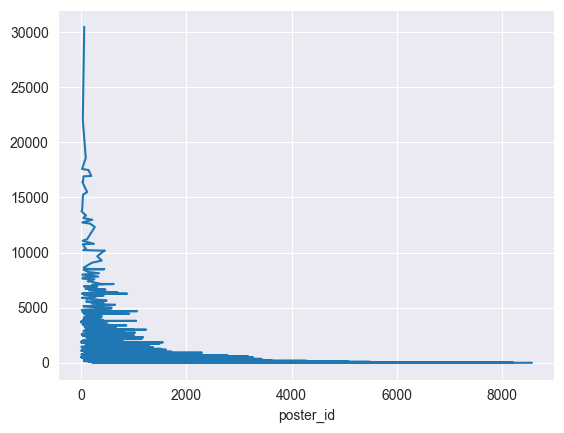

In [348]:
s = i.incel_posts
s.poster_id.sort_values(ascending=True).value_counts().plot()

In [349]:
# check how users' dynamics of posting changes overtime.
# Hypotjhesis, users who
i

IncelData(incel_threads, incel_posts, incel_users, incel_quotes)

In [351]:
i.incel_posts

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5
...,...,...,...,...,...,...,...,...
2266019,2266019,post-65986,1111,2017-12-01 00:25:46,WarmIncelation said: From my perspective ...,"<div class=""message-content js-messageContent""...",125921,33
2266020,2266020,post-66068,444,2017-12-01 01:00:02,universallyabhorred said: Finally it is w...,"<div class=""message-content js-messageContent""...",125921,34
2266021,2266021,post-66078,1111,2017-12-01 01:03:54,nausea said: I am sure the admin and the ...,"<div class=""message-content js-messageContent""...",125921,35
2266022,2266022,post-66110,444,2017-12-01 01:23:43,universallyabhorred said: Admins don't gi...,"<div class=""message-content js-messageContent""...",125921,36


In [352]:
i.incel

IncelData(incel_threads, incel_posts, incel_users, incel_quotes)

In [353]:
from src.common_basis import *

i = load_incel_parquet()

In [354]:
i.incel_posts

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5
...,...,...,...,...,...,...,...,...
2266019,2266019,post-65986,1111,2017-12-01 00:25:46,WarmIncelation said: From my perspective ...,"<div class=""message-content js-messageContent""...",125921,33
2266020,2266020,post-66068,444,2017-12-01 01:00:02,universallyabhorred said: Finally it is w...,"<div class=""message-content js-messageContent""...",125921,34
2266021,2266021,post-66078,1111,2017-12-01 01:03:54,nausea said: I am sure the admin and the ...,"<div class=""message-content js-messageContent""...",125921,35
2266022,2266022,post-66110,444,2017-12-01 01:23:43,universallyabhorred said: Admins don't gi...,"<div class=""message-content js-messageContent""...",125921,36


In [ ]:
ControlledInsanity said:



A man doing the ...